# Project 2:
## Business Question: 
### A company has bought a middle class house and wants to renovate it and then sell it. What could they take advantage of to make the most profit

In [8]:
# Initial imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import zscore
from utils import evaluate_model

In [9]:
df = pd.read_csv('data/kc_house_data.csv')

In [10]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0      5650     1.0        NaN  NONE  ...      7 Average       1180   
1      7242     2.0         NO  NONE  ...      7 Average       2170   
2     10000     1.0         NO  NONE  ...  6 Low Average        770   
3      5000     1.0         NO  NONE  ...      7 Average       1050   
4      8080     1.0         NO  NONE  ...         8 Good       1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

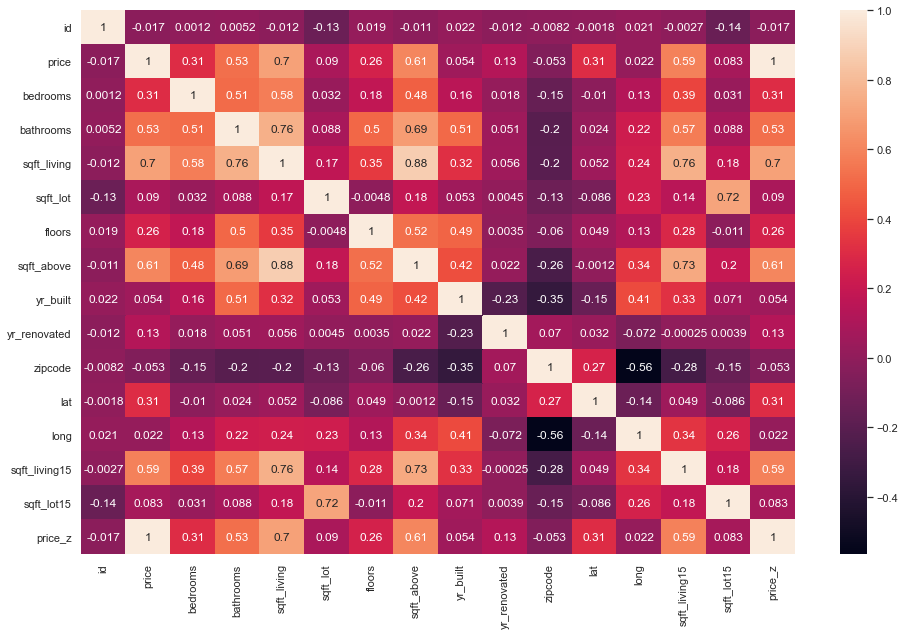

In [89]:
#Examining correlations
sns.set(rc = {'figure.figsize':(16,10)})
sns.heatmap(df.corr(), annot=True);

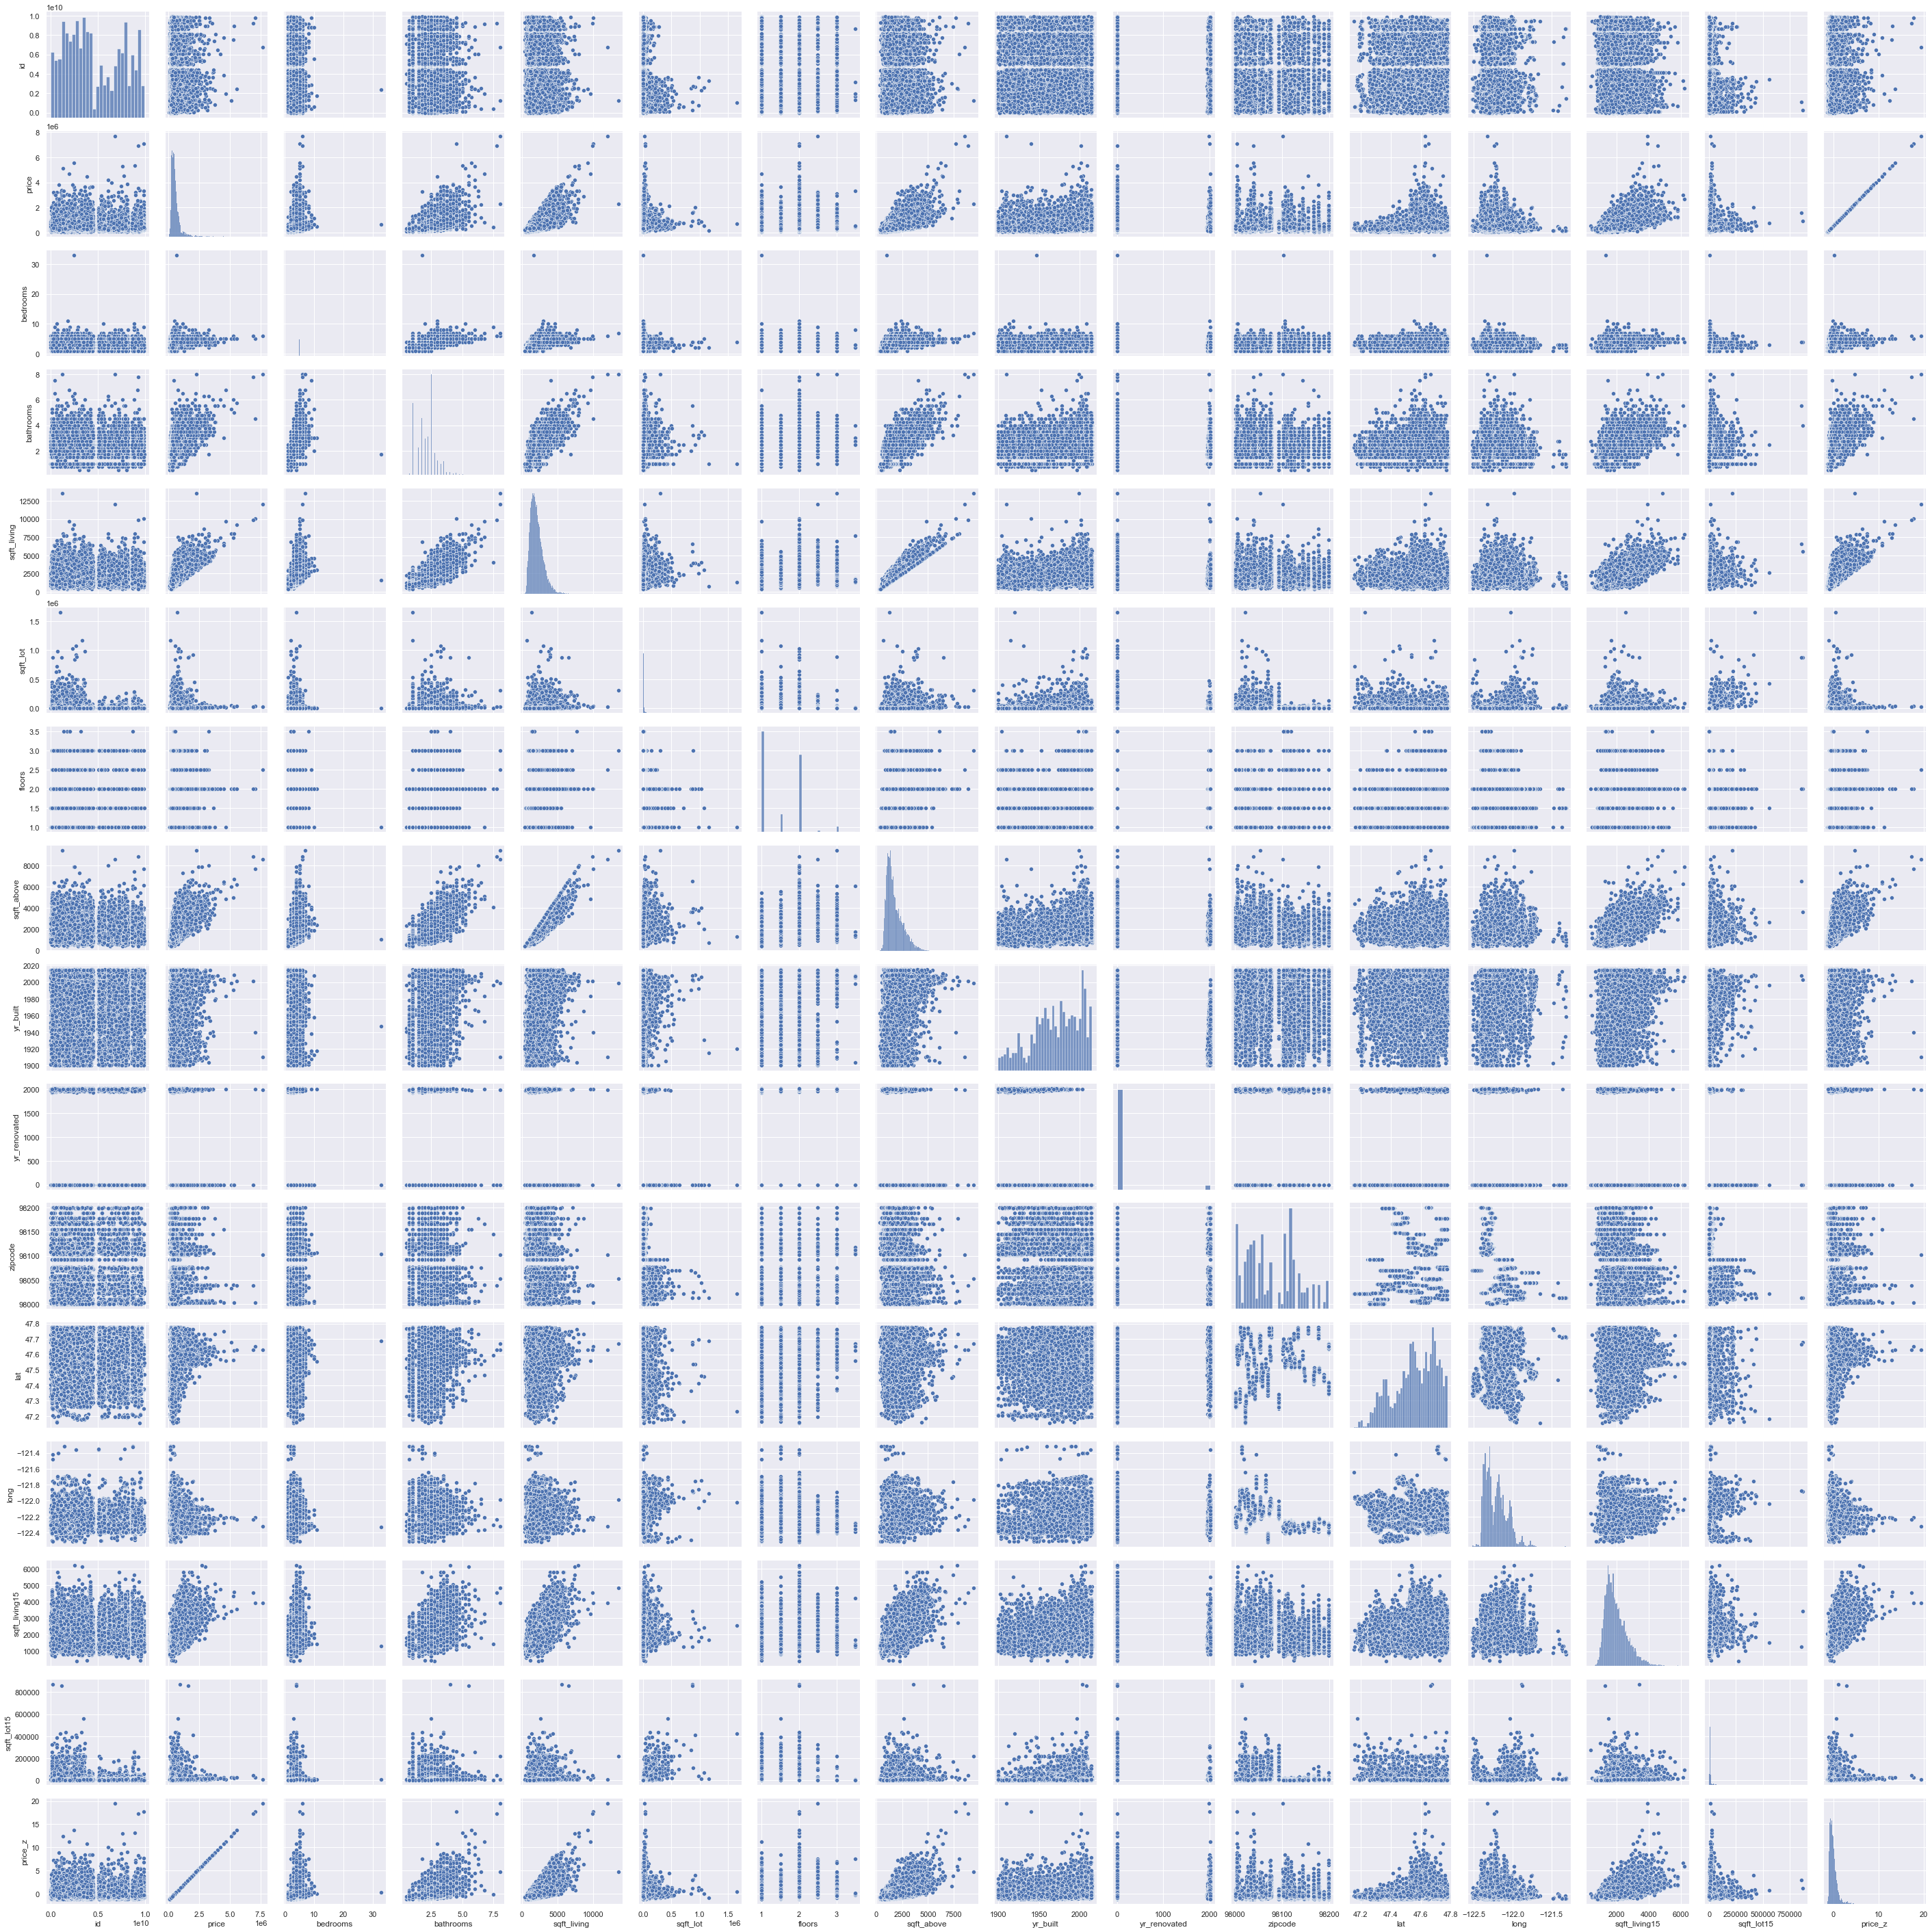

In [90]:
sns.pairplot(df);

Our business question is dealing with a middle class home. To examine middle-class homes, we are going to filter the data by price.

In [11]:
#Filtering data to get middle class homes
zscore(df['price'])

array([-0.86671627, -0.00625157, -0.98077344, ..., -0.37618606,
       -0.38190525, -0.58606486])

In [12]:
df['price_z'] = zscore(df['price'])
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ... sqft_above sqft_basement  yr_built  \
0      5650     1.0        NaN  NONE  ...       1180           0.0      1955   
1      7242     2.0         NO  NONE  ...       2170         400.0      1951   
2     10000     1.0         NO  NONE  ...        770           0.0      1933   
3      5000     1.0         NO  NONE  ...       1050         910.0      1965   
4      8080     1.0         NO  NONE  ...       1680           0.0      1987   

  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15   price_z  
0          0.0    98178  47.5112 -122.257           1340        5650 -0.866716  
1       1991.0    98125  47.7210 -122.319           1690        7639 -0.006252  
2          NaN    98028  47.7379 -122.233           2720        8062 -0.980773  
3          0.0    98136  47.5208 -122.393           1360        5000  0.173409  
4          0.0    98074  47.6168 -122.045           1800        7503 -0.082471  

[5 rows x 22 columns]

In [13]:
#price_z_df == new df
price_z_df = df[df['price_z'] <= 1][df['price_z'] >=-1]
price_z_df.head()

<ipython-input-13-1fa99e15c774>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  price_z_df = df[df['price_z'] <= 1][df['price_z'] >=-1]


id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ... sqft_above sqft_basement  yr_built  \
0      5650     1.0        NaN  NONE  ...       1180           0.0      1955   
1      7242     2.0         NO  NONE  ...       2170         400.0      1951   
2     10000     1.0         NO  NONE  ...        770           0.0      1933   
3      5000     1.0         NO  NONE  ...       1050         910.0      1965   
4      8080     1.0         NO  NONE  ...       1680           0.0      1987   

  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15   price_z  
0          0.0    98178  47.5112 -122.257           1340        5650 -0.866716  
1       1991.0    98125  47.7210 -122.319           1690        7639 -0.006252  
2          NaN    98028  47.7379 -122.233           2720        8062 -0.980773  
3          0.0    98136  47.5208 -122.393           1360        5000  0.173409  
4          0.0    98074  47.6168 -122.045           1800        7503 -0.082471  

[5 rows x 22 columns]

Our data has not been filtered to only include data with a price within one standard deviation of price. The next thing we are going to do is drop irrelevant columns. We are assuming the company already bought a house so we are going to drop variables that they do not have control over such as view and waterfront

In [14]:
#Droping irrelevant columns
df_new = price_z_df.drop(columns = 
                         ['id', 'date', 'lat', 'long', 'waterfront', 'view', 'yr_built', 'yr_renovated'])

Our next step is to turn columns with str values into int

In [15]:
#Turning sqft_basement into int instead of str
df_new['sqft_basement'] = df_new['sqft_living'] - df_new['sqft_above']

In [16]:
#Turning condition into int
df_new['condition'] = df_new['condition'].replace({'Average': 3, 'Very Good': 5, "Poor": 1, "Fair": 2, 'Good': 4}).astype(int)

In [17]:
df_new['condition'].unique

<bound method Series.unique of 0        3
1        3
2        3
3        5
4        3
        ..
21592    3
21593    3
21594    3
21595    3
21596    3
Name: condition, Length: 19205, dtype: int32>

In [18]:
#Turning grade into int
df_new['grade'].unique()

array(['7 Average', '6 Low Average', '8 Good', '9 Better', '5 Fair',
       '10 Very Good', '4 Low', '11 Excellent', '12 Luxury', '3 Poor'],
      dtype=object)

In [19]:
df_new['grade'] = df_new['grade'].str[0:2].astype(int)

In [20]:
df_new['grade'].unique()

array([ 7,  6,  8,  9,  5, 10,  4, 11, 12,  3])

All of the columns we are dealing with have been converted to int. Now, it is time to model. Our first model will just look at the relationship between sqft_living and price

In [29]:
# Baseline model comparing price and sqft_living
X = df_new['sqft_living']
Y = df_new['price']

In [30]:
model1 = sm.OLS(Y, sm.add_constant(X))
results1 = model1.fit()
results1.params

const          193412.078489
sqft_living       137.670683
dtype: float64

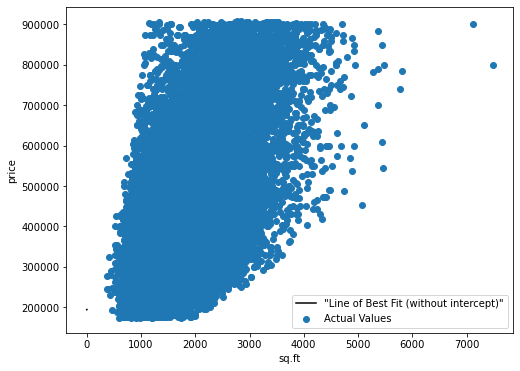

In [31]:
plt.figure(figsize=(8,6))

# this plots the actual data
plt.scatter(X, Y, label='Actual Values')

# this plots our line of best fit between 40 and 100
x_pred_range = np.linspace(0, 4, 14000)
plt.plot(x_pred_range, results1.predict(sm.add_constant(x_pred_range)), 
         label='"Line of Best Fit (without intercept)"', color='black')

plt.ylabel('price')
plt.xlabel('sq.ft')
plt.legend()
plt.show()

In [32]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     8811.
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:50:20   Log-Likelihood:            -2.5576e+05
No. Observations:               19205   AIC:                         5.115e+05
Df Residuals:                   19203   BIC:                         5.115e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.934e+05   3038.386     63.656      0.000    1.87e+05    1.99e+05
sqft_living   137.6707      1.467     93.865      0.000     134.796     140.546
==============================================================================
Omnibus:                      614.050   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              629.063
Skew:                           0.418   Prob(JB):                    2.52e-137
Kurtosis:                       2.703   Cond. No.                     5.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
#Training first model
X_train, X_test, y_train, y_test = train_test_split(
      X, Y, test_size=0.25, random_state=42)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     6536.
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:50:30   Log-Likelihood:            -1.9184e+05
No. Observations:               14403   AIC:                         3.837e+05
Df Residuals:                   14401   BIC:                         3.837e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.946e+05   3520.788     55.278      

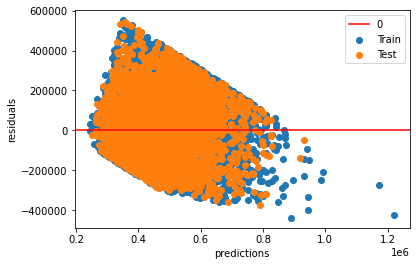

(10241    447982.584429
 2558     514583.693775
 5470     425324.475064
 4048     408845.850071
 6460     397860.100076
              ...      
 12623    388247.568830
 13372    587364.287494
 6052     385501.131331
 960      333318.818854
 17731    439056.662558
 Length: 14403, dtype: float64,
 3627     588737.506243
 10574    373142.162587
 16490    362156.412591
 4889     358036.756343
 1684     499478.287532
              ...      
 7316     393740.443828
 9584     373142.162587
 13320    380282.900084
 11078    620321.537479
 18803    525569.443771
 Length: 4802, dtype: float64)

In [35]:
evaluate_model(X_train, X_test, y_train, y_test)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=0.25, random_state=42)

In [36]:
#Second model
X = df_new['bathrooms']
Y = df_new['price']

In [38]:
model2 = sm.OLS(Y, sm.add_constant(X))
results2 = model2.fit()
results2.params

const        252541.974604
bathrooms    102156.873506
dtype: float64

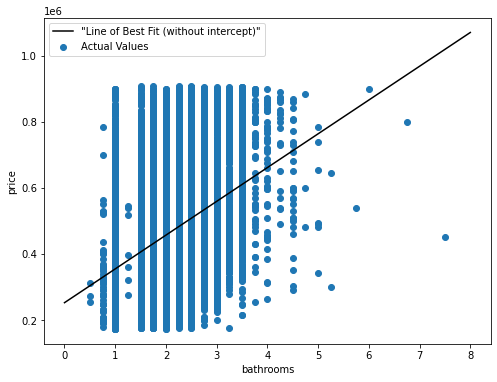

In [41]:
plt.figure(figsize=(8,6))

# this plots the actual data
plt.scatter(X, Y, label='Actual Values')

# this plots our line of best fit between 40 and 100
x_pred_range = np.linspace(0, 8, 80)
plt.plot(x_pred_range, results2.predict(sm.add_constant(x_pred_range)), 
         label='"Line of Best Fit (without intercept)"', color='black')

plt.ylabel('price')
plt.xlabel('bathrooms')
plt.legend()
plt.show()

In [42]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     3529.
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:52:02   Log-Likelihood:            -2.5777e+05
No. Observations:               19205   AIC:                         5.155e+05
Df Residuals:                   19203   BIC:                         5.156e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.525e+05   3695.704     68.334      0.000    2.45e+05     2.6e+05
bathrooms   1.022e+05   1719.542     59.409      0.000    9.88e+04    1.06e+05
==============================================================================
Omnibus:                      933.074   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              945.822
Skew:                           0.506   Prob(JB):                    4.14e-206
Kurtosis:                       2.602   Cond. No.                         8.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
#Train for second model
X_train, X_test, y_train, y_test = train_test_split(
     X, Y, test_size=0.25, random_state=42)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2648.
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:52:21   Log-Likelihood:            -1.9332e+05
No. Observations:               14403   AIC:                         3.866e+05
Df Residuals:                   14401   BIC:                         3.867e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.538e+05   4257.500     59.612      0.0

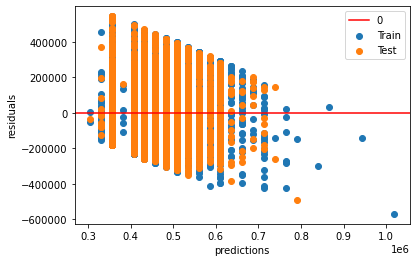

(10241    559818.639075
 2558     559818.639075
 5470     457812.281084
 4048     457812.281084
 6460     355805.923092
              ...      
 12623    457812.281084
 13372    483313.870581
 6052     406809.102088
 960      457812.281084
 17731    483313.870581
 Length: 14403, dtype: float64,
 3627     432310.691586
 10574    432310.691586
 16490    432310.691586
 4889     406809.102088
 1684     483313.870581
              ...      
 7316     355805.923092
 9584     355805.923092
 13320    483313.870581
 11078    508815.460079
 18803    559818.639075
 Length: 4802, dtype: float64)

In [45]:
evaluate_model(X_train, X_test, y_train, y_test)

Ok, we have now made two baseline models. Our next model will have multiple variables with price, sqft_living, and # of bathrooms

In [52]:
# OK so our rvalues suck lmao. Lets compare bathrooms, price, and sqft at same time
#This violate multicollinearity assumption
sample = df_new.sample(1000)

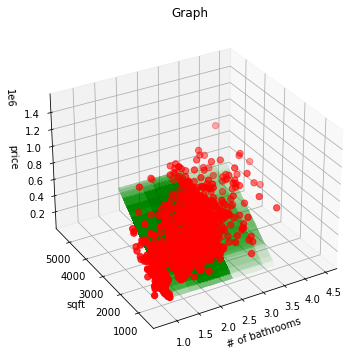

In [53]:
ax = plt.figure(figsize=(8, 6)).add_subplot(111, projection='3d')
ax.scatter(sample['bathrooms'], sample['sqft_living'], sample['price'],
           depthshade=True, s=40, color='#ff0000')
# create x,y
xx, yy = np.meshgrid(sample['bathrooms'], sample['sqft_living'])

# multiple linear regression model with both inputs
results = sm.OLS(df['price'], sm.add_constant(df[['bathrooms', 'sqft_living']])).fit()
# calculate corresponding z using parameters from the above model
z = results.params['bathrooms'] * xx + results.params['sqft_living'] * yy + results.params['const']

# plot the surface
ax.plot_surface(xx, yy, z, alpha=0.01, color='#00ff00')

ax.view_init(30, azim=240)
ax.set_xlabel('# of bathrooms')
ax.set_ylabel('sqft')
ax.set_zlabel('price')
plt.title('Graph');

In [54]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 1.049e+04
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:55:48   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21594   BIC:                         6.002e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.992e+04   5237.187     -7.622      0.000   -5.02e+04   -2.97e+04
bathrooms   -5095.2734   3535.830     -1.441      0.150    -1.2e+04    1835.215
sqft_living   284.0883      2.962     95.926      0.000     278.284     289.893
==============================================================================
Omnibus:                    14783.268   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           540478.758
Skew:                           2.815   Prob(JB):                         0.00
Kurtosis:                      26.852   Cond. No.                     7.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
#Train for 3d model
X = df_new[['sqft_living', 'bathrooms']]
y = df_new['price']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.25, random_state=42)

In [59]:
model_train_3d = sm.OLS(y_train, sm.add_constant(X_train)).fit()

In [60]:
model_train_3d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     3268.
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:56:12   Log-Likelihood:            -1.9184e+05
No. Observations:               14403   AIC:                         3.837e+05
Df Residuals:                   14400   BIC:                         3.837e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.932e+05   3984.817     48.482      0.000    1.85e+05    2.01e+05
sqft_living   136.0506      2.374     57.313      0.000     131.398     140.704
bathrooms    1916.4262   2499.918      0.767      0.443   -2983.735    6816.587
==============================================================================
Omnibus:                      466.056   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              467.591
Skew:                           0.410   Prob(JB):                    2.91e-102
Kurtosis:                       2.673   Cond. No.                     7.12e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
#Sidenote: COOL MODEL ALERT!
import plotly.graph_objects as go

In [62]:
import plotly.express as px

fig = px.scatter_3d(df, x='sqft_living', y='bathrooms', z='price')
fig.show()

In [65]:
# Next step is to create some more models 
df_new.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'zipcode',
       'sqft_living15', 'sqft_lot15', 'price_z'],
      dtype='object')

In [96]:
#Let's compare different types of sqft living. Is it better to expand the house to take up more of the lot? 
X = df_new['sqft_living'] / df_new['sqft_lot']
y = df_new['price']

In [97]:
model_rat1 = sm.OLS(y, sm.add_constant(X))
results = model_rat1.fit()
results.params

const    425139.771519
0        110333.248820
dtype: float64

In [98]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     558.8
Date:                Wed, 29 Jun 2022   Prob (F-statistic):          8.43e-122
Time:                        16:10:48   Log-Likelihood:            -2.5912e+05
No. Observations:               19205   AIC:                         5.182e+05
Df Residuals:                   19203   BIC:                         5.183e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.251e+05   1962.856    216.592      0.000    4.21e+05    4.29e+05
0           1.103e+05   4667.478     23.639      0.000    1.01e+05    1.19e+05
==============================================================================
Omnibus:                     1326.754   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.789
Skew:                           0.583   Prob(JB):                    6.92e-282
Kurtosis:                       2.492   Cond. No.                         4.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.25, random_state=42)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     431.8
Date:                Wed, 29 Jun 2022   Prob (F-statistic):           1.59e-94
Time:                        14:58:56   Log-Likelihood:            -1.9432e+05
No. Observations:               14403   AIC:                         3.887e+05
Df Residuals:                   14401   BIC:                         3.887e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.252e+05   2272.533    187.099      0.0

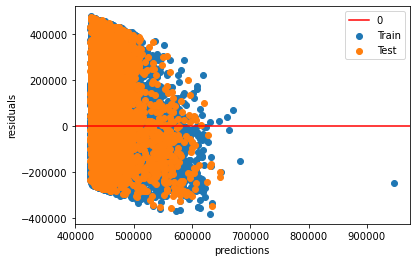

(10241    465767.842810
 2558     450496.455795
 5470     434620.786425
 4048     448519.742738
 6460     437689.059679
              ...      
 12623    428713.180428
 13372    437462.677027
 6052     456371.785234
 960      440539.416775
 17731    452420.122915
 Length: 14403, dtype: float64,
 3627     437336.402427
 10574    436642.177084
 16490    452557.936022
 4889     436315.395335
 1684     450598.359235
              ...      
 7316     443670.851559
 9584     437339.929849
 13320    514713.692626
 11078    459316.265391
 18803    447377.453364
 Length: 4802, dtype: float64)

In [70]:
evaluate_model(X_train, X_test, y_train, y_test)

In [71]:
#Running model on condition, grade, sqft living, and bathrooms
X = df_new[['condition', 'grade', 'sqft_living', 'bathrooms']]
Y = df_new['price']

In [72]:
model_multi = sm.OLS(Y, sm.add_constant(X))
results = model_multi.fit()
results.params

const         -346690.382983
condition       33338.512623
grade           75317.997234
sqft_living        84.573178
bathrooms      -16951.628591
dtype: float64

In [73]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     3269.
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:01:53   Log-Likelihood:            -2.5440e+05
No. Observations:               19205   AIC:                         5.088e+05
Df Residuals:                   19200   BIC:                         5.089e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.467e+05    1.1e+04    -31.432      0.000   -3.68e+05   -3.25e+05
condition    3.334e+04   1578.256     21.124      0.000    3.02e+04    3.64e+04
grade        7.532e+04   1433.920     52.526      0.000    7.25e+04    7.81e+04
sqft_living    84.5732      2.135     39.608      0.000      80.388      88.759
bathrooms   -1.695e+04   2069.254     -8.192      0.000    -2.1e+04   -1.29e+04
==============================================================================
Omnibus:                      503.782   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              544.055
Skew:                           0.412   Prob(JB):                    7.24e-119
Kurtosis:                       2.966   Cond. No.                     2.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
#Training multi model
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.25, random_state=42)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     2429.
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:02:31   Log-Likelihood:            -1.9082e+05
No. Observations:               14403   AIC:                         3.817e+05
Df Residuals:                   14398   BIC:                         3.817e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.445e+05   1.28e+04    -26.958      

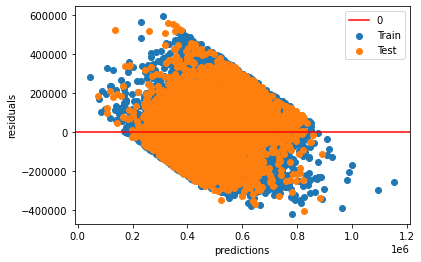

(10241    526665.334355
 2558     578628.494969
 5470     313755.945961
 4048     411828.619258
 6460     314131.866904
              ...      
 12623    399287.183104
 13372    559890.225745
 6052     482038.630021
 960      333612.251636
 17731    393717.164939
 Length: 14403, dtype: float64,
 3627     569275.239396
 10574    438008.207651
 16490    419906.924653
 4889     389441.994652
 1684     506380.098154
              ...      
 7316     419729.401894
 9584     483062.686236
 13320    433806.987610
 11078    575682.064637
 18803    585317.260917
 Length: 4802, dtype: float64)

In [75]:
evaluate_model(X_train, X_test, y_train, y_test)

In [ ]:
#bedrooms ratio bathrooms grade condition sqft living zipcode w/ price
#sqft lot 15, sqft living, bedrooms/ bathroom, floors, grad, condition, zipcode, sqft basement

In [76]:
df_new['bbratio'] = df['bathrooms'] / df['bedrooms']

In [152]:
X = df_new[['bbratio', 'grade', 'condition', 'sqft_living', 'zipcode']]
y = df_new['price']

In [153]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.25, random_state=42)

In [154]:
# scale our data - now let's use a Min Max Scaler because binaries!
scaler = MinMaxScaler()

# train on train data
scaler.fit(X_train_enc)

# transform both train and test data
X_train_scaled = scaler.transform(X_train_enc)
X_test_scaled = scaler.transform(X_test_enc)

In [155]:
cat_cols = ['zipcode']

In [156]:
# create an encoder object. This will help us to convert
# categorical variables to new columns
encoder = OneHotEncoder(handle_unknown='error',
                        drop='first')

# Create an columntransformer object.
# This will help us to merge transformed columns
# with the rest of the dataset.
ct = ColumnTransformer(transformers=[('ohe', encoder, cat_cols)],
                       remainder='passthrough', sparse_threshold=0)
ct.fit(X_train)
X_train_enc = ct.transform(X_train)
X_test_enc = ct.transform(X_test)

In [157]:
# can display as a dataframe like so
X_train_enc = pd.DataFrame(X_train_enc, columns= ct.get_feature_names())

In [158]:
X_train_enc.index = y_train.index

In [159]:
model3 = sm.OLS(y_train, sm.add_constant(X_train_enc))
results = model3.fit()
results.params

const           -315701.724896
ohe__x0_98002       341.378373
ohe__x0_98003       106.808434
ohe__x0_98004    478991.927721
ohe__x0_98005    326766.520443
                     ...      
ohe__x0_98199    336118.589799
bbratio           -8445.845917
grade             44559.052085
condition         22432.978343
sqft_living         106.247773
Length: 74, dtype: float64

In [160]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     713.4
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        16:52:16   Log-Likelihood:            -1.8349e+05
No. Observations:               14403   AIC:                         3.671e+05
Df Residuals:                   14329   BIC:                         3.677e+05
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.157e+05   9588.719    -32.924      0.000   -3.34e+05   -2.97e+05
ohe__x0_98002   341.3784   8900.037      0.038      0.969   -1.71e+04    1.78e+04
ohe__x0_98003   106.8084   7758.829      0.014      0.989   -1.51e+04    1.53e+04
ohe__x0_98004   4.79e+05   1.09e+04     43.913      0.000    4.58e+05       5e+05
ohe__x0_98005  3.268e+05   1.05e+04     31.225      0.000    3.06e+05    3.47e+05
ohe__x0_98006  2.599e+05   7410.558     35.068      0.000    2.45e+05    2.74e+05
ohe__x0_98007  2.476e+05   9740.699     25.416      0.000    2.28e+05    2.67e+05
ohe__x0_98008  2.477e+05   7812.225     31.703      0.000    2.32e+05    2.63e+05
ohe__x0_98010  1.023e+05   1.11e+04      9.239      0.000    8.06e+04    1.24e+05
ohe__x0_98011   1.47e+05   8467.423     17.365      0.000     1.3e+05    1.64e+05
ohe__x0_98014  1.485e+05   1.04e+04     14.280      0.000    1.28e+05    1.69e+05
ohe__x0_98019   1.11e+05   8957.739     12.386      0.000    9.34e+04    1.29e+05
ohe__x0_98022  3.802e+04   8357.782      4.549      0.000    2.16e+04    5.44e+04
ohe__x0_98023 -2.085e+04   6882.951     -3.030      0.002   -3.43e+04   -7361.678
ohe__x0_98024  1.821e+05   1.39e+04     13.058      0.000    1.55e+05    2.09e+05
ohe__x0_98027  1.979e+05   7168.875     27.599      0.000    1.84e+05    2.12e+05
ohe__x0_98028  1.397e+05   7788.508     17.937      0.000    1.24e+05    1.55e+05
ohe__x0_98029  2.256e+05   7622.939     29.594      0.000    2.11e+05    2.41e+05
ohe__x0_98030  9048.0707   8063.615      1.122      0.262   -6757.659    2.49e+04
ohe__x0_98031  7779.3768   7770.653      1.001      0.317   -7452.110     2.3e+04
ohe__x0_98032 -1.467e+04   1.05e+04     -1.398      0.162   -3.52e+04    5897.783
ohe__x0_98033  3.148e+05   7586.426     41.498      0.000       3e+05     3.3e+05
ohe__x0_98034  1.809e+05   6699.166     27.006      0.000    1.68e+05    1.94e+05
ohe__x0_98038  4.578e+04   6631.373      6.904      0.000    3.28e+04    5.88e+04
ohe__x0_98039  5.994e+05   4.81e+04     12.469      0.000    5.05e+05    6.94e+05
ohe__x0_98040  4.062e+05   1.05e+04     38.649      0.000    3.86e+05    4.27e+05
ohe__x0_98042  1.481e+04   6694.151      2.212      0.027    1683.905    2.79e+04
ohe__x0_98045  1.173e+05   8462.856     13.861      0.000    1.01e+05    1.34e+05
ohe__x0_98052   2.55e+05   6750.450     37.769      0.000    2.42e+05    2.68e+05
ohe__x0_98053  2.537e+05   7363.583     34.449      0.000    2.39e+05    2.68e+05
ohe__x0_98055  4.211e+04   7979.657      5.277      0.000    2.65e+04    5.78e+04
ohe__x0_98056   1.06e+05   7230.348     14.660      0.000    9.18e+04     1.2e+05
ohe__x0_98058  4.015e+04   7034.491      5.707      0.000    2.64e+04    5.39e+04
ohe__x0_98059  1.038e+05   6980.362     14.870      0.000    9.01e+04    1.17e+05
ohe__x0_98065  1.491e+05   7665.114     19.446   

In [161]:
train_df = X_train.copy()
train_df['price'] = y_train

In [162]:
train_df.head()

bbratio  grade  condition  sqft_living  zipcode     price
10241  1.000000      8          5         1845    98056  510000.0
2558   1.000000      9          3         2330    98034  612000.0
5470   0.666667      6          3         1680    98198  258000.0
4048   0.500000      7          4         1560    98034  439000.0
6460   0.333333      6          3         1480    98027  455000.0

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     713.4
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        16:53:19   Log-Likelihood:            -1.8349e+05
No. Observations:               14403   AIC:                         3.671e+05
Df Residuals:                   14329   BIC:                         3.677e+05
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.157e+05   9588.719    -32.924

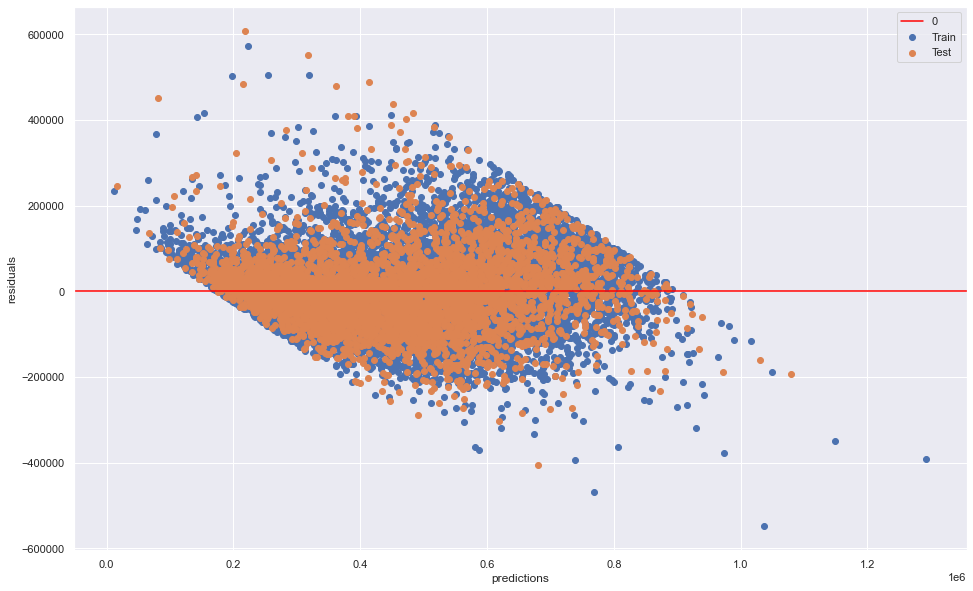

(10241    446511.453864
 2558     572655.551454
 5470     236328.812864
 4048     428382.563703
 6460     371239.691615
              ...      
 12623    209269.194958
 13372    733953.988491
 6052     562118.186991
 960      393187.431737
 17731    292078.531592
 Length: 14403, dtype: float64,
 array([528968.24898457, 469262.15836198, 272720.95228118, ...,
        430722.06593442, 544167.5272188 , 547274.91018533]))

In [164]:
evaluate_model(X_train_enc, X_test_enc, y_train, y_test)

In [168]:
#All Variable model excluding lat and long in bryan notebook
X = df_new[['bbratio', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'zipcode',
       'sqft_living15', 'sqft_lot15']]
Y = df_new['price']

In [169]:
model_all = sm.OLS(Y, sm.add_constant(X))
results = model_all.fit()
results.params

const           -5.218894e+07
bbratio          5.032451e+03
sqft_living      4.066924e+01
sqft_lot         2.048714e-01
floors           1.712249e+04
condition        3.712812e+04
grade            6.634036e+04
sqft_above       1.806681e+00
sqft_basement    3.878001e+01
zipcode          5.280412e+02
sqft_living15    6.080559e+01
sqft_lot15      -1.724103e-01
dtype: float64

In [170]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     1513.
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:00:28   Log-Likelihood:            -2.5381e+05
No. Observations:               19205   AIC:                         5.076e+05
Df Residuals:                   19194   BIC:                         5.077e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.219e+07   1.91e+06    -27.387      0.000   -5.59e+07   -4.85e+07
bbratio        5032.4509   5333.365      0.944      0.345   -5421.411    1.55e+04
sqft_living      40.6692      1.397     29.113      0.000      37.931      43.407
sqft_lot          0.2049      0.035      5.838      0.000       0.136       0.274
floors         1.712e+04   2457.773      6.967      0.000    1.23e+04    2.19e+04
condition      3.713e+04   1579.843     23.501      0.000     3.4e+04    4.02e+04
grade          6.634e+04   1537.057     43.161      0.000    6.33e+04    6.94e+04
sqft_above        1.8067      1.680      1.075      0.282      -1.487       5.100
sqft_basement    38.7800      1.812     21.397      0.000      35.227      42.333
zipcode         528.0412     19.417     27.194      0.000     489.981     566.101
sqft_living15    60.8056      2.637     23.060      0.000      55.637      65.974
sqft_lot15       -0.1724      0.053     -3.241      0.001      -0.277      -0.068
==============================================================================
Omnibus:                      553.370   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              601.606
Skew:                           0.431   Prob(JB):                    2.31e-131
Kurtosis:                       3.094   Cond. No.                     3.73e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.39e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     2079.
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:00:59   Log-Likelihood:            -1.9062e+05
No. Observations:               14403   AIC:                         3.813e+05
Df Residuals:                   14397   BIC:                         3.813e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.606e+07   2.14e+06    -21.524      

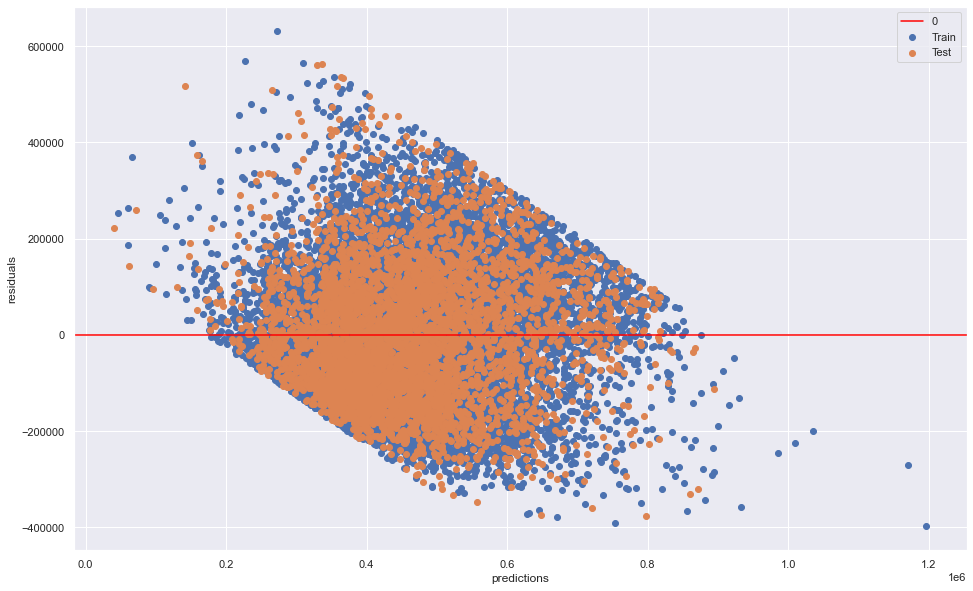

(10241    540738.702752
 2558     574798.238225
 5470     370170.750467
 4048     392026.152343
 6460     270615.942784
              ...      
 12623    376938.769622
 13372    523233.536851
 6052     494725.274962
 960      334101.600822
 17731    379695.690718
 Length: 14403, dtype: float64,
 3627     599258.683578
 10574    431292.671384
 16490    413897.171264
 4889     382564.714882
 1684     544323.980468
              ...      
 7316     367235.375409
 9584     432408.653900
 13320    461177.697652
 11078    548134.093261
 18803    570462.452944
 Length: 4802, dtype: float64)

In [172]:
evaluate_model(X_train, X_test, y_train, y_test)